## <p style="text-align:center;">Go to TOP 2.5 % in 20 steps
<img src="images/titanic.jpg" style="width:650px;height:400px;">

In [1]:
# Setup : import packages 

import pandas as pd                   # a most common package for EDA (Exploratory Data Analysis)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline                    
# Built-in magic commands in jupyter ipython there are and line magics and cell magics)

In [2]:
# Load data & personal perspective
"""
   step.1 Import raw data
   step.2 EDA
   step.3 Depend on the EDA process, see if we have any operation or not
          see if we split the data into (X_train, Y_train, X_val, Y_val, X_test, Y_test)
          or any mean normalize required...
"""
raw_train = pd.read_csv("raw_data/" + "train.csv")
raw_test = pd.read_csv("raw_data/" + "test.csv")


In [3]:
print("\nraw_train = " + str(raw_train.shape[0]) + " row + " + str(raw_train.shape[1]) + " column")
display(raw_train.sample(5))           # multiple display in one cell via ipython.display
print("\nraw_test = " + str(raw_test.shape[0]) + " row + " + str(raw_test.shape[1]) + " column")
display(raw_test.sample(5))


raw_train = 891 row + 11 column


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
85,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
310,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
468,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
480,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S



raw_test = 418 row + 10 column


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
57,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.650,F G63,S
227,3,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.750,NaN,Q
14,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S
285,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.250,NaN,S
91,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.775,NaN,S


## Through Data Dictionary on the Titanic competetion page
## $You$ $will$  $see$
<table>
  <thead>
    <tr>
      <th><p style="text-align:center;">Variable</p></th>
      <th><p style="text-align:center;">Definition</th>
      <th><p style="text-align:center;">Key</th>
      <th><p style="text-align:center;">Variable Notes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><p style="text-align:center;">survival</td>
      <td><p style="text-align:center;">Survival</td>
      <td><p style="text-align:center;">0 = No, 1 = Yes</td>
    </tr>
    <tr>
      <td><p style="text-align:center;">pclass</td>
      <td><p style="text-align:center;">Ticket class</td>
      <td><p style="text-align:center;">1 = 1st, 2 = 2nd, 3 = 3rd</td>
      <td><p style="text-align:center;">pclass: A proxy for socio-economic status (SES)<br>1st = Upper, 2nd = Middle, 3rd = Lower</td>
    </tr>
      <tr>
      <td><p style="text-align:center;">sex</td>
      <td><p style="text-align:center;">Sex</td>
      <td> </td>
      <td> </td>
    </tr>
      <tr>
      <td><p style="text-align:center;">Age</td>
      <td><p style="text-align:center;">Age in years</td>
      <td> </td>
      <td><p style="text-align:center;">Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</td>
    </tr>
      <tr>
      <td><p style="text-align:center;">sibsp</td>
      <td><p style="text-align:center;"> # of siblings / spouses aboard the Titanic</td>
      <td> </td>
      <td><p style="text-align:center;"> The dataset defines family relations in this way (Sibling / Spouse)</td>
    </tr>
      <tr>
      <td><p style="text-align:center;">parch	</td>
      <td><p style="text-align:center;"> # of parents / children aboard the Titanic</td>
      <td> </td>
      <td><p style="text-align:center;"> The dataset defines family relations in this way<br>Parent = mother, father<br>Child = daughter, son, stepdaughter, stepson<br>Some children travelled only with a nanny, therefore parch=0 for them.</td>
    </tr>
      <tr>
      <td><p style="text-align:center;">ticket</td>
      <td><p style="text-align:center;"> Ticket number</td>
      <td> </td>
      <td> </td>
    </tr>
      <tr>
      <td><p style="text-align:center;">fare</td>
      <td><p style="text-align:center;"> Passenger fare	</td>
      <td> </td>
      <td> </td>
    </tr>
      <tr>
      <td><p style="text-align:center;">cabin	</td>
      <td><p style="text-align:center;"> Cabin number</td>
      <td> </td>
      <td> </td>
    </tr>
      <tr>
      <td><p style="text-align:center;">embarked	</td>
      <td><p style="text-align:center;"> Port of Embarkation</td>
      <td><p style="text-align:center;"> C = Cherbourg, Q = Queenstown, S = Southampton</td>
      <td> </td>
    </tr>
  </tbody>
</table>

And the relationship could be connected between train set and test set, 
e.g baby in train set, nanny in test set etc., <br>therefor, we will gather 2 set together to check

In [4]:
merge_rawdata = raw_train.append(raw_test,ignore_index = True)  # ignore_index to ensure unique index
print("\nmerge_rawdata = " + str(merge_rawdata.shape[0]) + " row + " + str(merge_rawdata.shape[1]) + " column")

display(merge_rawdata.sample(5))                                # have a glance at the data.
merge_rawdata.info()

print("\ncheck if there is any duplicated data through name. : True for duplicated ; False for unique")
display(merge_rawdata.name.duplicated().value_counts())         # check if there is any duplicated data through name.


merge_rawdata = 1309 row + 11 column


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
861,0.0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
992,NaN,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S
1035,NaN,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,17475,26.5500,NaN,S
866,1.0,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
746,0.0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    float64
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB

check if there is any duplicated data through name. : True for duplicated ; False for unique


False    1307
True        2
Name: name, dtype: int64

In [5]:
# merge_rawdata.name.value_counts()
print("check the duplicated name, to ensure it's not a really duplicated data")
display(merge_rawdata.loc[merge_rawdata["name"] == "Kelly, Mr. James"])
display(merge_rawdata.loc[merge_rawdata["name"] == "Connolly, Miss. Kate"])

check the duplicated name, to ensure it's not a really duplicated data


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
696,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
289,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [6]:
# define ticket group and sub_group volumn
for tikit in merge_rawdata.ticket.unique() :
    count = merge_rawdata.loc[merge_rawdata["ticket"] == tikit].shape[0]  
    idx1 = merge_rawdata["ticket"] == tikit
    merge_rawdata.loc[idx1,"group"] = int(count)                                        # group : buy ticket together

merge_rawdata["sub_group"] = merge_rawdata["sibsp"] + merge_rawdata["parch"] + 1  # sub_group : sib/sp + par/ch
display(merge_rawdata.sample(5))

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,group,sub_group
638,0.0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.00,0,5,3101295,39.6875,NaN,S,7.0,6
1099,NaN,1,"Rosenbaum, Miss. Edith Louise",female,33.00,0,0,PC 17613,27.7208,A11,C,1.0,1
803,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,2.0,2
745,0.0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S,2.0,3
31,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,3.0,2


## Thought about group and sub_group

Here we will define some new property of $high-group-connection$ & $high-sub-group-connection$
<table>
  <thead><p style="text-align:center;">Define group connection</thead>
    <tr>
      <th>condition</th>
      <th>condition 1</th>
      <th>condition 2</th>
      <th><p style="text-align:center;">possible type</th>
      <th>High group connection</th>
      <th>High sub_group connection</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><p style="text-align:center;">group == 1</td>
      <td><p style="text-align:center;">group >= sub_group</td>
      <td></td>
      <td><p style="text-align:left;">single traveler</td>
      <td><p style="text-align:center;">0</td>
      <td><p style="text-align:center;">0</td>
    </tr>
    <tr>
      <td><p style="text-align:center;">group == 1</td>
      <td><p style="text-align:center;">group < sub_group</td>
      <td></td>
      <td><p style="text-align:left;">with sibsp or parch, but buy ticket by self</td>
      <td><p style="text-align:center;">0</td>
      <td><p style="text-align:center;">2</td>
    </tr>
    <tr>
      <td><p style="text-align:center;">group /= 1</td>
      <td><p style="text-align:center;">sub_group == 1</td>
      <td></td>
      <td><p style="text-align:left;">nanny, couple, company, school, etc.,</td>
      <td><p style="text-align:center;">2</td>
      <td><p style="text-align:center;">0</td>
    </tr>
    <tr>
      <td><p style="text-align:center;">group /= 1</td>
      <td><p style="text-align:center;">sub_group > 1</td>
      <td>group >= sub_group</td>
      <td><p style="text-align:left;">In this case, I think :
          <br>the sub_group within more close relation than group
          <br>because they have close sibsp or parch in the big group</td>
      <td><p style="text-align:center;">1</td>
      <td><p style="text-align:center;">2</td>
    </tr>
    <tr>
      <td><p style="text-align:center;">group /= 1</td>
      <td><p style="text-align:center;">sub_group > 1</td>
      <td>group < sub_group</td>
      <td><p style="text-align:left;">In this case, I think :
          <br>the ticket group within more close relation than sub_group
          <br>because this could be the smallest unit to live together</td>
      <td><p style="text-align:center;">2</td>
      <td><p style="text-align:center;">1</td>
    </tr>
  </tbody>
</table>

This paramete are try to define, you are tend to "concern / follow" the group or sub_group

In [7]:
# define high/ low group connection 
for idx1 in range (len(merge_rawdata)) :
    tkgp = merge_rawdata.loc[idx1,"group"]
    sbgp = merge_rawdata.loc[idx1,"sub_group"]
    if tkgp == 1 :
       if tkgp >= sbgp : 
          merge_rawdata.loc[idx1,"High_group_connection"] = 0
          merge_rawdata.loc[idx1,"High_sub_group_connection"] = 0
       else :
          merge_rawdata.loc[idx1,"High_group_connection"] = 0
          merge_rawdata.loc[idx1,"High_sub_group_connection"] = 2

    if tkgp > 1 :
        if sbgp <= 1.0 :
            merge_rawdata.loc[idx1,"High_group_connection"] = 2
            merge_rawdata.loc[idx1,"High_sub_group_connection"] = 0
        elif tkgp > sbgp : 
            merge_rawdata.loc[idx1,"High_group_connection"] = 1
            merge_rawdata.loc[idx1,"High_sub_group_connection"] = 2
        else :
            merge_rawdata.loc[idx1,"High_group_connection"] = 2
            merge_rawdata.loc[idx1,"High_sub_group_connection"] = 1

display(merge_rawdata.sample(3))

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,group,sub_group,High_group_connection,High_sub_group_connection
705,0.0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,2.0,1,2.0,0.0
798,0.0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C,1.0,1,0.0,0.0
753,0.0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S,1.0,1,0.0,0.0


## Identify known survial in the group or Known survial in the sub_group?

In [8]:
# define group_Knonw_Surv
for tikit in merge_rawdata.ticket.unique() :
    idx1 = merge_rawdata["ticket"] == tikit
    group_Knonw_Surv = merge_rawdata.loc[idx1,"survived"].sum()
    merge_rawdata.loc[idx1, "group_Knonw_Surv"] = group_Knonw_Surv

# define sub_group_Knonw_Surv
merge_rawdata["sub_group_Knonw_Surv"] = 0
for tikit in merge_rawdata.ticket.unique():
    idx1 = merge_rawdata["ticket"] == tikit
    ticket_group = merge_rawdata.loc[merge_rawdata["ticket"] == tikit].shape[0]
    
    sub_group_Knonw_Surv = merge_rawdata.loc[(merge_rawdata["ticket"] == tikit) & (merge_rawdata["sub_group"] > 1) & (merge_rawdata["survived"] == 1)].shape[0]
    merge_rawdata.loc[(merge_rawdata["ticket"] == tikit) & (merge_rawdata["sub_group"] > 1), "sub_group_Knonw_Surv"] = sub_group_Knonw_Surv

display(merge_rawdata.sample(3))

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,group,sub_group,High_group_connection,High_sub_group_connection,group_Knonw_Surv,sub_group_Knonw_Surv
1045,NaN,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S,7.0,7,2.0,1.0,3.0,3
1118,NaN,3,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.7500,NaN,Q,1.0,1,0.0,0.0,0.0,0
37,0.0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S,1.0,1,0.0,0.0,0.0,0


In [9]:
# define group weighted parameter
merge_rawdata["group_weight"] = merge_rawdata["group"] * merge_rawdata["group_Knonw_Surv"] * merge_rawdata["High_group_connection"]
merge_rawdata["sub_group_weight"] = merge_rawdata["sub_group"] * merge_rawdata["sub_group_Knonw_Surv"] * merge_rawdata["High_sub_group_connection"]
print("see the sample")
display(merge_rawdata.sample(3))

see the sample


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,group,sub_group,High_group_connection,High_sub_group_connection,group_Knonw_Surv,sub_group_Knonw_Surv,group_weight,sub_group_weight
1230,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,1.0,1,0.0,0.0,0.0,0,0.0,0.0
1067,NaN,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S,4.0,1,2.0,0.0,1.0,0,8.0,0.0
466,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,3.0,1,2.0,0.0,0.0,0,0.0,0.0


In [10]:
### glance at the data, and check the na column
merge_rawdata.loc[merge_rawdata.embarked.isna(), "embarked"] = "S"
display(merge_rawdata.loc[merge_rawdata.ticket == "113572"])

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,group,sub_group,High_group_connection,High_sub_group_connection,group_Knonw_Surv,sub_group_Knonw_Surv,group_weight,sub_group_weight
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,2.0,1,2.0,0.0,2.0,0,8.0,0.0
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,2.0,1,2.0,0.0,2.0,0,8.0,0.0


In [11]:
### glance at the fare data, and check the na column
guess_fare = merge_rawdata.loc[(merge_rawdata["group"] == 1) & (merge_rawdata["pclass"] == 3)].fare.mean()
#print("guess_fare = " + str(guess_fare))
merge_rawdata.loc[merge_rawdata.fare.isna(), "fare"] = guess_fare

In [12]:
### glance at the age data, and check the na column
merge_rawdata["title"] = merge_rawdata.name.str.extract(' ([A-Za-z]+)\.', expand = False)  # get string end with "." in name
display(merge_rawdata.groupby("title")["age"].mean())
pd.crosstab(merge_rawdata["title"], merge_rawdata["sex"])
merge_rawdata["title_mean_age"] = merge_rawdata.groupby("title").age.transform("mean")

display(merge_rawdata.loc[merge_rawdata.age.isna()])

title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: age, dtype: float64

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,group,sub_group,High_group_connection,High_sub_group_connection,group_Knonw_Surv,sub_group_Knonw_Surv,group_weight,sub_group_weight,title,title_mean_age
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,...,1.0,1,0.0,0.0,0.0,0,0.0,0.0,Mr,32.252151
17,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,...,1.0,1,0.0,0.0,1.0,0,0.0,0.0,Mr,32.252151
19,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,...,1.0,1,0.0,0.0,1.0,0,0.0,0.0,Mrs,36.994118
26,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,...,1.0,1,0.0,0.0,0.0,0,0.0,0.0,Mr,32.252151
28,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,...,1.0,1,0.0,0.0,1.0,0,0.0,0.0,Miss,21.774238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,...,1.0,1,0.0,0.0,0.0,0,0.0,0.0,Miss,21.774238
1301,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,...,1.0,1,0.0,0.0,0.0,0,0.0,0.0,Miss,21.774238
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,1.0,1,0.0,0.0,0.0,0,0.0,0.0,Mr,32.252151
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,1.0,1,0.0,0.0,0.0,0,0.0,0.0,Mr,32.252151


In [13]:
### fill up the na column in age
#display(merge_rawdata["title"].unique())
for titl in ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 
             'Capt', 'Countess', 'Jonkheer', 'Dona'] :
   mean_age = merge_rawdata.loc[merge_rawdata["title"] == titl, "age"].mean()
   mask1 = merge_rawdata["title"] == titl
   mask2 = merge_rawdata["age"].isna()
   merge_rawdata.loc[mask1 & mask2, "age"] = mean_age

display(merge_rawdata.loc[merge_rawdata["age"].isna()])

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,group,sub_group,High_group_connection,High_sub_group_connection,group_Knonw_Surv,sub_group_Knonw_Surv,group_weight,sub_group_weight,title,title_mean_age


In [14]:
from sklearn.preprocessing import OneHotEncoder
encode_embarked = merge_rawdata["embarked"].values.reshape(-1,1)

onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(encode_embarked)

merge_rawdata["EmbarkedC"] = train_OneHotEncoded[:,0]
merge_rawdata["EmbarkedQ"] = train_OneHotEncoded[:,1]
merge_rawdata["EmbarkedS"] = train_OneHotEncoded[:,2]

# mapping female as 0, male as 1
merge_rawdata["sex"] = merge_rawdata["sex"].map({"male":1, "female":0})
display(merge_rawdata.sample(3))

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,High_sub_group_connection,group_Knonw_Surv,sub_group_Knonw_Surv,group_weight,sub_group_weight,title,title_mean_age,EmbarkedC,EmbarkedQ,EmbarkedS
1110,NaN,3,"Thomson, Mr. Alexander Morrison",1,32.252151,0,0,32302,8.050,NaN,...,0.0,0.0,0,0.0,0.0,Mr,32.252151,0.0,0.0,1.0
675,0.0,3,"Edvardsson, Mr. Gustaf Hjalmar",1,18.000000,0,0,349912,7.775,NaN,...,0.0,0.0,0,0.0,0.0,Mr,32.252151,0.0,0.0,1.0
1016,NaN,3,"Cribb, Miss. Laura Alice",0,17.000000,0,1,371362,16.100,NaN,...,1.0,0.0,0,0.0,0.0,Miss,21.774238,0.0,0.0,1.0


In [15]:
# get ticket number digit (I treat this as a cue to identify the group member)
merge_rawdata["ticket_num"] = merge_rawdata.ticket.str.replace('.','')  # get rid of "." .
merge_rawdata["ticket_num"] = merge_rawdata.ticket.str.replace('\s','')  # get rid of " " 
merge_rawdata["ticket_num"] = merge_rawdata.ticket.str.replace('\W','')  # get rid of "\W" 
merge_rawdata["ticket_num"] = merge_rawdata.ticket_num.str.extract('([0-9 ]+)', expand = False)  # get string in num.

# there is a ticket == LINE, need to assign a num specificly
merge_rawdata.loc[merge_rawdata.ticket == "LINE", "ticket_num"] = "88919"            # assign a random num specificly
# total 929 unique ticket became unique 923, but I just lazy to correct these

display(merge_rawdata.ticket.value_counts())
display(merge_rawdata.ticket_num.value_counts())
display(merge_rawdata.sample(3))

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347082       7
            ..
244373       1
349212       1
220367       1
345779       1
2695         1
Name: ticket, Length: 929, dtype: int64

2343      11
2144       8
1601       8
14879      7
347077     7
          ..
349218     1
2657       1
31418      1
7540       1
2695       1
Name: ticket_num, Length: 924, dtype: int64

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,group_Knonw_Surv,sub_group_Knonw_Surv,group_weight,sub_group_weight,title,title_mean_age,EmbarkedC,EmbarkedQ,EmbarkedS,ticket_num
1095,NaN,2,"Andrew, Mr. Frank Thomas",1,25.000000,0,0,C.A. 34050,10.50,NaN,...,0.0,0,0.0,0.0,Mr,32.252151,0.0,0.0,1.0,34050
934,NaN,2,"Corbett, Mrs. Walter H (Irene Colvin)",0,30.000000,0,0,237249,13.00,NaN,...,0.0,0,0.0,0.0,Mrs,36.994118,0.0,0.0,1.0,237249
1147,NaN,3,"Mahon, Mr. John",1,32.252151,0,0,AQ/4 3130,7.75,NaN,...,0.0,0,0.0,0.0,Mr,32.252151,0.0,1.0,0.0,43130


In [16]:
# machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm

In [17]:
from sklearn.model_selection import train_test_split

arr_data = merge_rawdata.drop(columns=["name", "sibsp", "parch", "ticket", "fare", "cabin", "embarked", "group", "sub_group", 
                                       "High_group_connection", "High_sub_group_connection", "group_Knonw_Surv", "sub_group_Knonw_Surv", 
                                       "title", "title_mean_age", "EmbarkedC", "EmbarkedQ", "EmbarkedS"])

# after some test and validation, I found embarked information doesn't pay a good effect to the result, therefore I finally omit these

train_data = arr_data[0:891]
test_data = arr_data[891:1309]

X_train, X_val = train_test_split(train_data, random_state = 589, train_size = 0.99)

Y_train = X_train[["survived"]]
X_train = X_train.drop(columns=["survived"])

Y_val = X_val[["survived"]]
X_val = X_val.drop(columns=["survived"])

Y_test = test_data[["survived"]]
X_test = test_data.drop(columns=["survived"])

print(X_train.columns)
print("X_train = " + str(len(X_train)))
print("X_val = " + str(len(X_val)))
print("X_test = " + str(len(X_test)))

display(train_data.sample(3))

Index(['pclass', 'sex', 'age', 'group_weight', 'sub_group_weight',
       'ticket_num'],
      dtype='object')
X_train = 882
X_val = 9
X_test = 418


,survived,pclass,sex,age,group_weight,sub_group_weight,ticket_num
224,1.0,1,1,38.0,8.0,4.0,19943
714,0.0,2,1,52.0,0.0,0.0,250647
171,0.0,3,1,4.0,0.0,0.0,382652


In [18]:
# RandomForestClassifier  # (Acturally, I ran some different algorithm also tuned some parameter with some evaluation metric)
print(X_train.columns)

rfc = RandomForestClassifier(n_estimators = 100, random_state = 50, max_leaf_nodes = 50, max_depth = 1000, criterion = 'gini')
rfc.fit(X_train, Y_train.values.ravel())

train_score = rfc.score(X_train,Y_train)
val_score = rfc.score(X_val,Y_val)

print("\n" + str(len(X_train)) + "samples,_RandomForest_train_score = " + str(train_score))
print(str(len(X_val)) + "samples,_RandomForest_val_score = " + str(val_score))

Y_test = rfc.predict(X_test)
Y_test = pd.Series(Y_test)

Index(['pclass', 'sex', 'age', 'group_weight', 'sub_group_weight',
       'ticket_num'],
      dtype='object')

882samples,_RandomForest_train_score = 0.9263038548752834
9samples,_RandomForest_val_score = 1.0


In [19]:
# check predict_y again
print(X_train.columns)
klfier = 3
if klfier == 1 :
   train_score = lr.score(X_train,Y_train)
   val_score = lr.score(X_val,Y_val)
   print("\n" + str(len(X_train)) + "samples,_Linear_Regression_train_score = " + str(train_score))
   print(str(len(X_val)) + "samples,_Linear_Regression_val_score = " + str(val_score))
    
   Y_test = lr.predict(X_test)
   Y_test = pd.Series(Y_test)
    
elif klfier == 2 :
      train_score = linear_svc.score(X_train,Y_train)
      val_score = linear_svc.score(X_val,Y_val)
      print("\n" + str(len(X_train)) + "samples,_LinearSVC_train_score = " + str(train_score))
      print(str(len(X_val)) + "samples,_LinearSVC_val_score = " + str(val_score))
        
      Y_test = linear_svc.predict(X_test)
      Y_test = pd.Series(Y_test)
    
else :
      train_score = rfc.score(X_train,Y_train)
      val_score = rfc.score(X_val,Y_val)
      print("\n" + str(len(X_train)) + "samples,_RandomForest_train_score = " + str(train_score))
      print(str(len(X_val)) + "samples,_RandomForest_val_score = " + str(val_score))
        
      Y_test = rfc.predict(X_test)
      Y_test = pd.Series(Y_test)

display(Y_test[0:21])

Index(['pclass', 'sex', 'age', 'group_weight', 'sub_group_weight',
       'ticket_num'],
      dtype='object')

882samples,_RandomForest_train_score = 0.9263038548752834
9samples,_RandomForest_val_score = 1.0


0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     1.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    0.0
20    0.0
dtype: float64

In [20]:
import os
os.getcwd()

Y_test.to_csv('RandomForestClassifier_Result.csv', index = False)

## The final score of above process is 0.811
## rank 445 / 17436 (~top 2.5%)

<img src="images/titanic.png" style="width:650px;height:400px;">

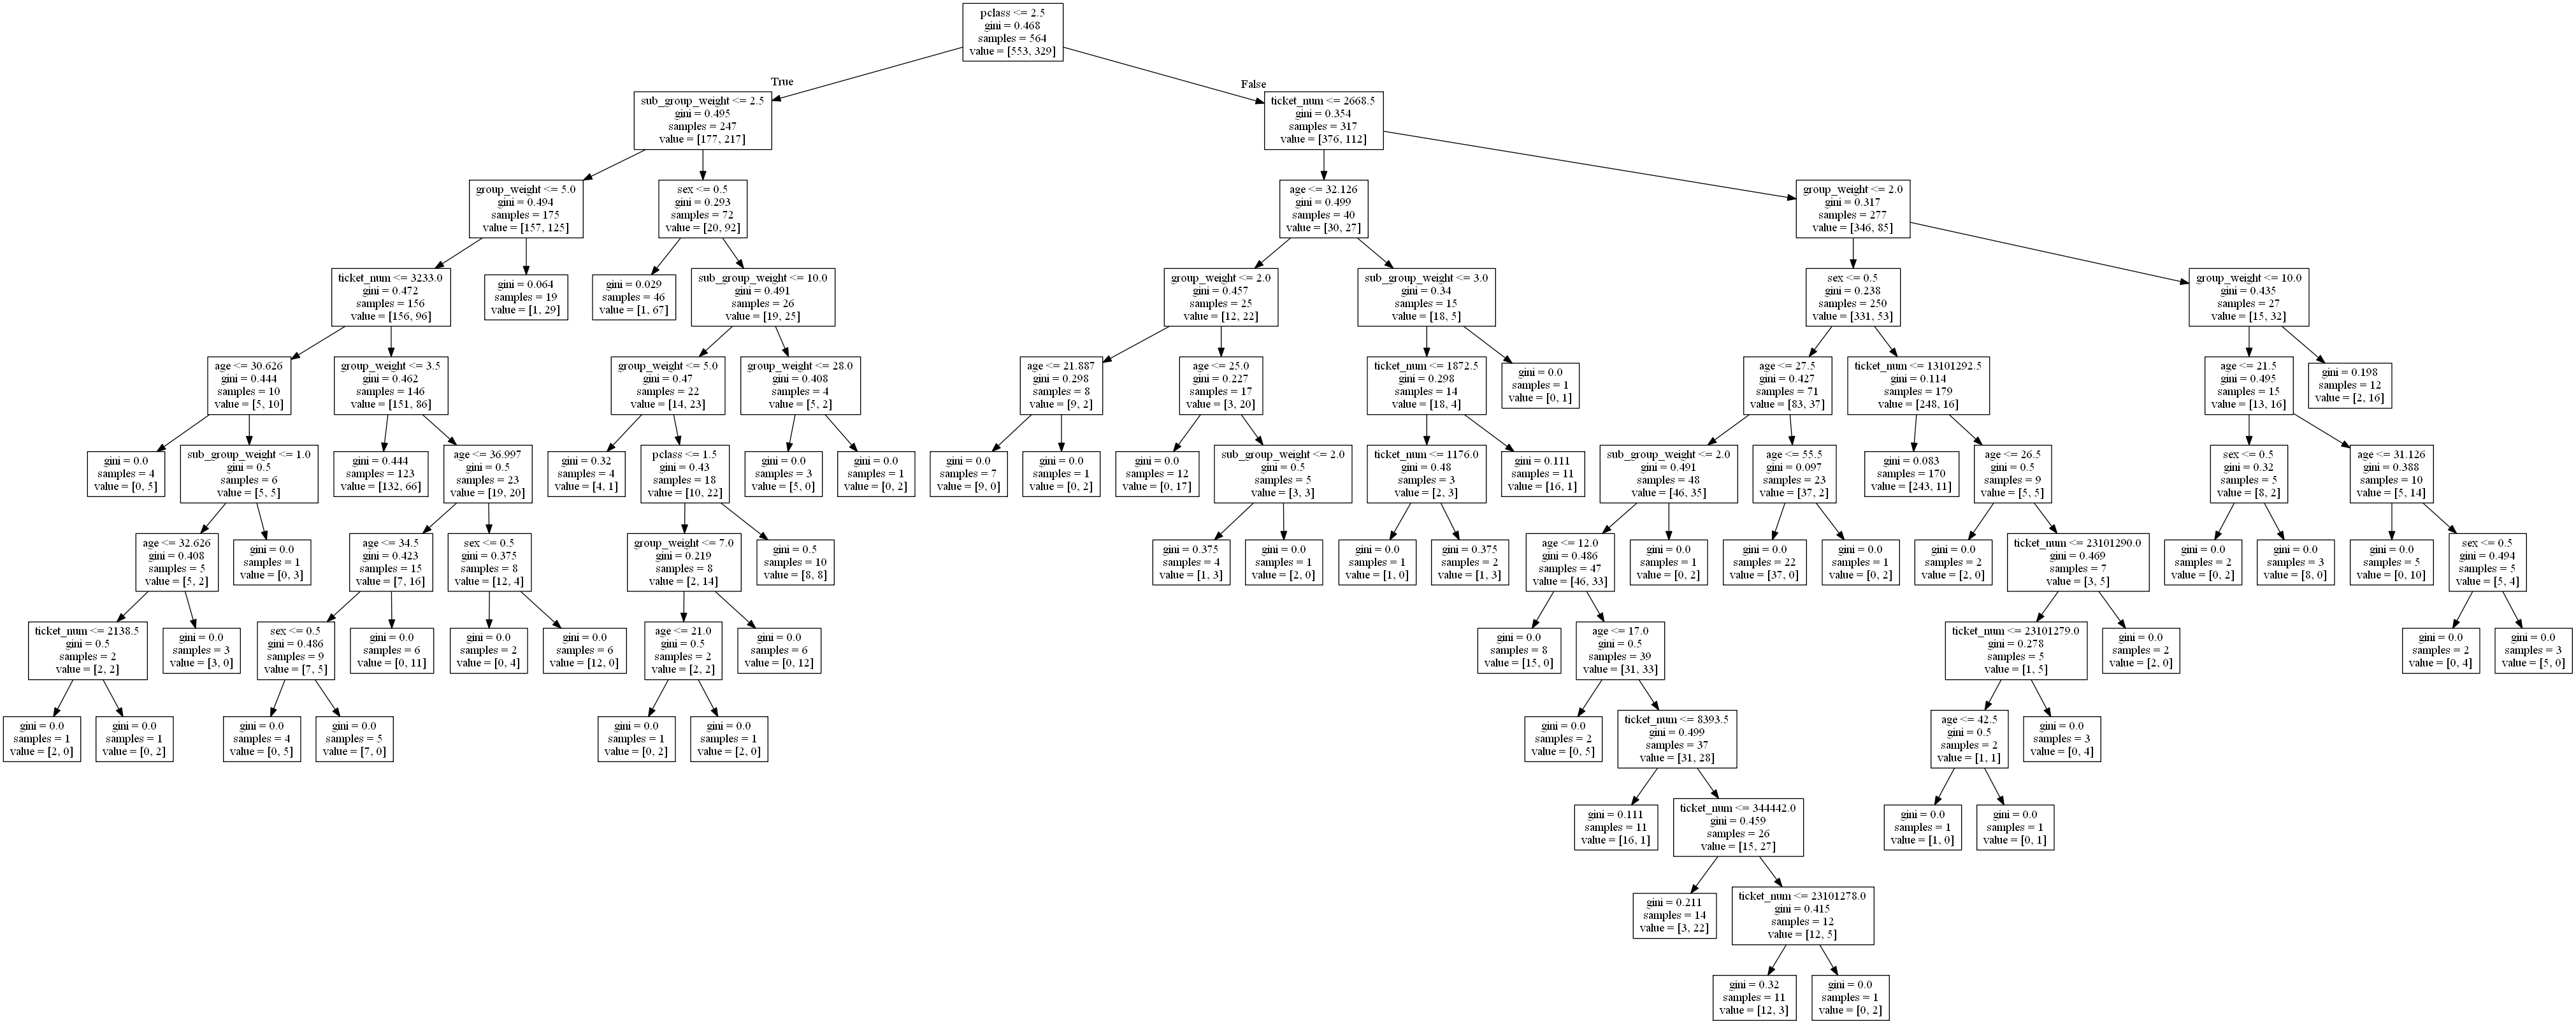

In [21]:
# here you can see one of the decision tree
from sklearn.tree import export_graphviz
import pydotplus                               # not a default package in anaconda, you need to install it
from IPython.display import Image             # shown in jupyter

estimator = rfc.estimators_[49]                # pick a specific tree from the forest n_estimators = 100

dot_data = tree.export_graphviz(estimator, out_file = None, feature_names = X_train.columns) # Export as dot file

graph = pydotplus.graph_from_dot_data(dot_data)              # graph the dot file
Image(graph.create_png())

#graph.write_pdf("Titanic.pdf")                # Create PDF
#graph.write_png("Titanic.png")                # Create PNG